In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math
import io

In [ ]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


IndexError: ignored

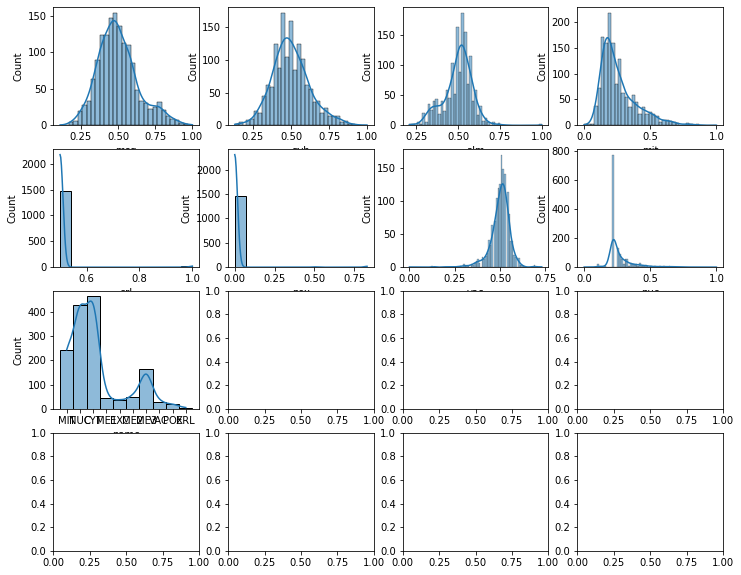

In [ ]:
# 1: Histogram + Density Plot
n = len(data.columns)-1
dim = math.ceil(n//2)

fig, p = plt.subplots(dim, dim)
fig.set_figwidth(12)
fig.set_figheight(10)

i = 0;
for j in range(0, dim):
  for k in range(0, dim):
    sns.histplot(ax=p[j, k], x=data.iloc[:, i], kde=True)
    i+=1
plt.show()

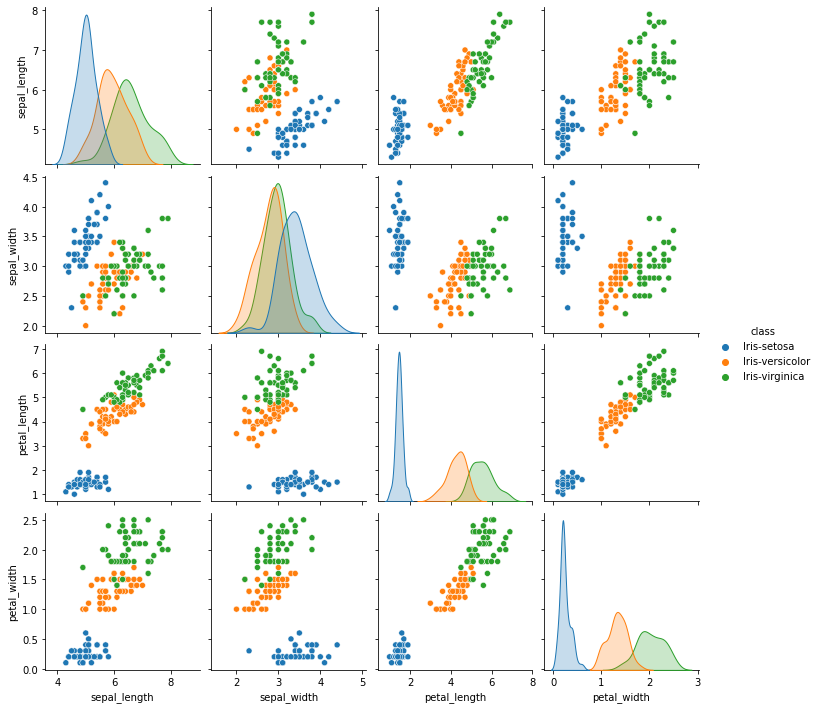

In [ ]:
# 2: Scatter Plot
sns.pairplot(data, hue='class')

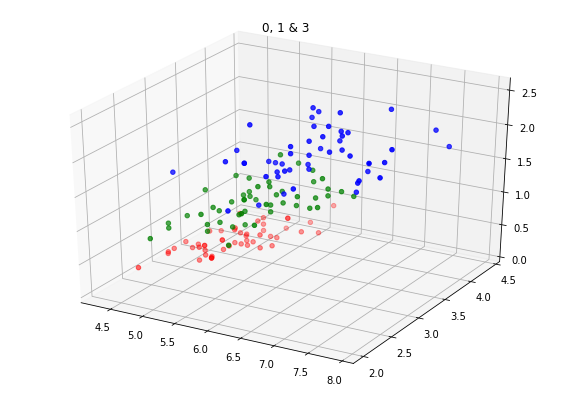

In [ ]:
# 2: 3D Scatter Plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")
colors = []
colors = colors + ['red' for i in range(50)]
colors = colors + ['green' for i in range(50)]
colors = colors + ['blue' for i in range(50)]

ax.scatter3D(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 3], c=colors)
plt.title("0, 1 & 3")
plt.show() 

In [ ]:
def getMean(col):
  sum = 0
  for row in col:
    sum = sum + row
  return sum / len(col)

def getMin(col):
  mini = float('inf')
  for row in col:
    mini = min(mini, row)
  return mini

def getMax(col):
  maxi = float('-inf')
  for row in col:
    maxi = max(maxi, row)
  return maxi

def getVarience(col):
  var = 0
  mean = getMean(col)
  for row in col:
    var = var + (row - mean)**2
  return var / (len(col) - 1)

def getStandardDeviation(col):
  return getVarience(col)**1/2

def getCorr(col1, col2):
  mean1 = getMean(col1)
  mean2 = getMean(col2)
  sd1 = 0
  sd2 = 0

  corr = 0;
  for i in range(len(col1)):
    sd1 = sd1 + (col1[i]-mean1)**2
    sd2 = sd2 + (col2[i]-mean2)**2
    corr = corr + ( (col1[i] - mean1) * (col2[i] - mean2) )
  return corr / (sd1 * sd2)**(1/2)

In [ ]:
# 3: find stats for each feature.
for i in range(n):
  d = data.iloc[:, i]
  feature = data.columns[i]
  
  mean=getMean(d)
  mini=getMin(d)
  maxi=getMax(d)
  var=getVarience(d)
  sd=getStandardDeviation(d)
  
  print("Stats for feature", feature, ":")
  print("Mean:", mean)
  print("Standard Deviation:", sd)
  print("Varience:", var)
  print("Min:", mini)
  print("Max:", maxi)
  print()
  print("-----------------------------")
  print()

Stats for feature sepal_length :
Mean: 5.843333333333335
Standard Deviation: 0.34284675615212523
Varience: 0.6856935123042505
Min: 4.3
Max: 7.9

-----------------------------

Stats for feature sepal_width :
Mean: 3.0540000000000007
Standard Deviation: 0.09400201342281882
Varience: 0.18800402684563763
Min: 2.0
Max: 4.4

-----------------------------

Stats for feature petal_length :
Mean: 3.7586666666666693
Standard Deviation: 1.5565897091722578
Varience: 3.1131794183445156
Min: 1.0
Max: 6.9

-----------------------------

Stats for feature petal_width :
Mean: 1.1986666666666672
Standard Deviation: 0.2912071588366892
Varience: 0.5824143176733784
Min: 0.1
Max: 2.5

-----------------------------



In [ ]:
# 4: Correlation Matrix
def getCorrMat(data):
  n = len(data.columns)-1
  corr = [[1 for i in range(n)] for i in range(n)]
  for i in range(n):
    for j in range(i+1, n):
      t = getCorr(data.iloc[:, i], data.iloc[:, j])
      corr[i][j] = corr[j][i] = t
  return corr

corr = getCorrMat(data)

for i in corr:
  for j in i:
    print(j, end=" ")
  print()

1 -0.10936924995064935 0.8717541573048719 0.8179536333691635 
-0.10936924995064935 1 -0.42051609640115484 -0.3565440896138055 
0.8717541573048719 -0.42051609640115484 1 0.9627570970509667 
0.8179536333691635 -0.3565440896138055 0.9627570970509667 1 


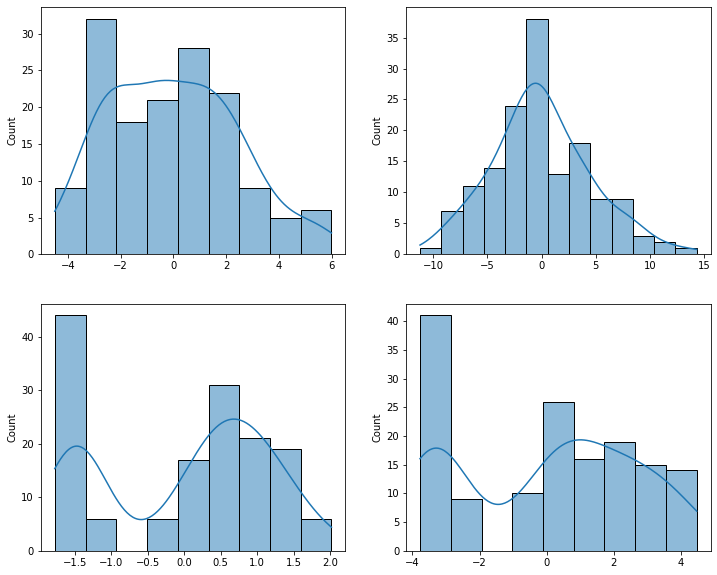

In [ ]:
# 5: Standardization
n = len(data.columns)-1
dim = math.ceil(n/2)

# sns.set()

fig, p = plt.subplots(dim, dim)
fig.set_figwidth(12)
fig.set_figheight(10)

i = 0;
for j in range(0, dim):
  for k in range(0, dim):
    y = data.iloc[:, i]
    mean = getMean(y)
    sd = getStandardDeviation(y)
    d = [((l-mean)/sd) for l in y]
    sns.histplot(ax=p[j, k], x=d, kde=True)
    i+=1
plt.show()

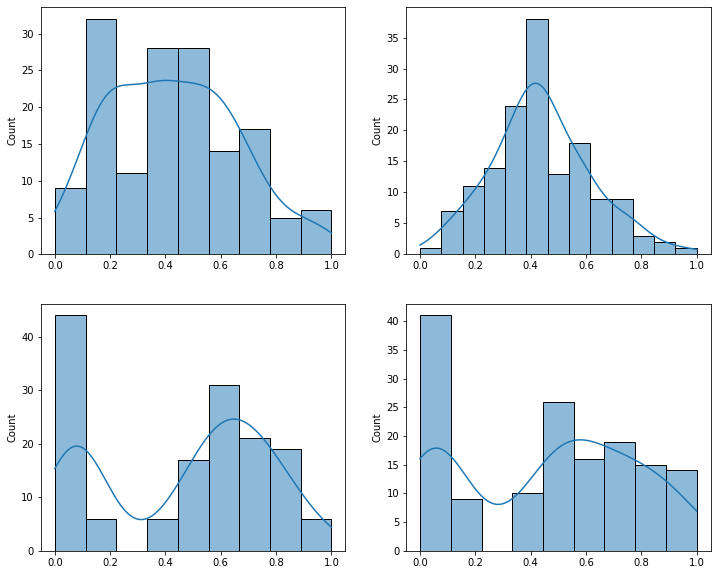

In [ ]:
# 5: Normalization
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
n = len(data.columns)-1
dim = math.ceil(n/2)

# sns.set()

fig, p = plt.subplots(dim, dim)
fig.set_figwidth(12)
fig.set_figheight(10)

i = 0;
for j in range(0, dim):
  for k in range(0, dim):
    y = data.iloc[:, i]
    mini = getMin(y)
    maxi = getMax(y)
    d = [((l-mini)/(maxi-mini)) for l in y]
    sns.histplot(ax=p[j, k], x=d, kde=True)
    i+=1
plt.show()

# 5: Standardization & Normalization


---


Observation: As we can see the only change that occurs after standardization and normalization is in the range of x-axis (value of feature). After doing normalization all the values fall into range (0 to 1). However representation of data remains intact.